* Remaining To do:
 * Provide Conclusion

# Employee Attrition and Performance

* To find the reason why the churn rate is going very high and Developing a predicting Engine Whether people will leave or not

* Analysis Carried out by: Aravind R 

* Data Source: Kaggle 


In [3]:
# Performing all necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.model_selection import train_test_split

# Model Tuning Engine's and Validation Engine(Final)
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_val_score,StratifiedKFold,cross_val_predict

# For Imbalanced Classification

from imblearn.over_sampling import SMOTE

# Boosting,bagging and Forest Engine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split
# Xg boost(Modern Gradient Boosting Algorithm)
from xgboost import XGBClassifier
# Cat Boost
from catboost import CatBoostClassifier
#Metrics

from sklearn.metrics import accuracy_score,balanced_accuracy_score,plot_roc_curve,plot_precision_recall_curve,log_loss,cohen_kappa_score
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report
# Deep learining model if necessary

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
plt.style.use('ggplot')
print("ALL OK")

ALL OK


In [4]:
# Importing dataset
df = pd.read_csv('employee_attrition_train.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,...,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,...,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,...,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,...,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,...,4,80,0,18,4,3,8,6,4,0


## EDA (Exploritory Data Analysis)

* Insights gathering

* Feature importance 

* Correlation stats

* Data Visualization

In [81]:
# Shape of the Dataset
df.shape

(1029, 35)

In [82]:
# let us check the features
for i,j in enumerate(df.columns):
    print(i,j)

0 Age
1 Attrition
2 BusinessTravel
3 DailyRate
4 Department
5 DistanceFromHome
6 Education
7 EducationField
8 EmployeeCount
9 EmployeeNumber
10 EnvironmentSatisfaction
11 Gender
12 HourlyRate
13 JobInvolvement
14 JobLevel
15 JobRole
16 JobSatisfaction
17 MaritalStatus
18 MonthlyIncome
19 MonthlyRate
20 NumCompaniesWorked
21 Over18
22 OverTime
23 PercentSalaryHike
24 PerformanceRating
25 RelationshipSatisfaction
26 StandardHours
27 StockOptionLevel
28 TotalWorkingYears
29 TrainingTimesLastYear
30 WorkLifeBalance
31 YearsAtCompany
32 YearsInCurrentRole
33 YearsSinceLastPromotion
34 YearsWithCurrManager


In [83]:
# Information of dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
Age                         893 non-null float64
Attrition                   1029 non-null object
BusinessTravel              1024 non-null object
DailyRate                   1002 non-null float64
Department                  1029 non-null object
DistanceFromHome            934 non-null float64
Education                   1029 non-null int64
EducationField              1029 non-null object
EmployeeCount               1029 non-null int64
EmployeeNumber              1029 non-null int64
EnvironmentSatisfaction     1029 non-null int64
Gender                      1029 non-null object
HourlyRate                  1029 non-null int64
JobInvolvement              1029 non-null int64
JobLevel                    1029 non-null int64
JobRole                     1029 non-null object
JobSatisfaction             1029 non-null int64
MaritalStatus               1024 non-null object
MonthlyIncome     

In [84]:
# Summary stats
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,893.000000,1002.000000,934.000000,1029.000000,1029.0,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,...,1029.000000,1029.0,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,37.930571,800.528942,9.930407,2.892128,1.0,1024.367347,2.683188,66.680272,2.713314,2.043732,...,2.689990,80.0,0.822157,11.196307,2.782313,2.748299,6.942663,4.215743,2.119534,4.005831
std,9.395978,408.109828,8.421791,1.053541,0.0,606.301635,1.096829,20.474094,0.710146,1.118918,...,1.077767,0.0,0.874662,7.857581,1.283401,0.697278,6.068322,3.658595,3.108651,3.522574
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,458.250000,2.000000,2.000000,1.0,496.000000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,37.000000,801.500000,8.000000,3.000000,1.0,1019.000000,3.000000,67.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,44.000000,1162.000000,16.000000,4.000000,1.0,1553.000000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.000000,7.000000
max,60.000000,1496.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [85]:
# Check for null values and filling with median
df.isna().sum()
x = df['Age'].median()
df['Age'].fillna(x,inplace=True)
df['DailyRate'].fillna(df['DailyRate'].median(),inplace=True)


Text(0.5, 1.0, 'Imbalance Determination')

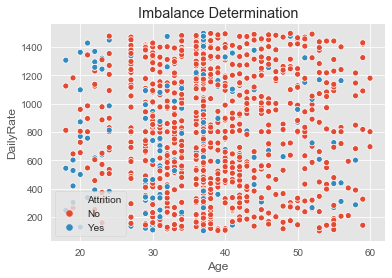

In [86]:
# Just a check for imbalancing which is confirmed::::
sns.scatterplot(df['Age'],df['DailyRate'],hue=df['Attrition']);
plt.title("Imbalance Determination")

In [87]:
# check for null values
df.isna().sum()

Age                          0
Attrition                    0
BusinessTravel               5
DailyRate                    0
Department                   0
DistanceFromHome            95
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                5
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInC

In [88]:
#Re arranging the columns for convienence sake::::::: (:)
df2 = df[['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager','Attrition']]

In [89]:
df2.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,50.0,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,4,...,80,1,32,1,2,5,4,1,3,No
1,36.0,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,2,...,80,2,7,0,3,3,2,0,1,No
2,21.0,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,2,...,80,0,1,3,3,1,0,1,0,Yes
3,50.0,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,1,...,80,1,32,2,3,32,5,10,7,No
4,52.0,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,2,...,80,0,18,4,3,8,6,4,0,No


###### Save a backup because we are going to do oversampling to handle imbalancing manually using (Synthetic Minority over sampling technique)
* Smote

In [90]:
# Before doing smote Removing null values and gathering insights is performed

In [91]:
df2['DistanceFromHome'].fillna(df2.DistanceFromHome.median(),inplace=True)

C:\Users\Aravind R\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [92]:
df2.dropna(axis=0,inplace=True)

C:\Users\Aravind R\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [93]:
df3 = df2.copy()

In [94]:
# After removing null values
df2.isna().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [95]:
df2.Attrition.value_counts()

No     844
Yes    175
Name: Attrition, dtype: int64

In [96]:
# Checking the shape
df2.shape

(1019, 35)

In [97]:
# Checnking the head again
df2.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,50.0,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,4,...,80,1,32,1,2,5,4,1,3,No
1,36.0,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,2,...,80,2,7,0,3,3,2,0,1,No
2,21.0,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,2,...,80,0,1,3,3,1,0,1,0,Yes
3,50.0,Travel_Frequently,1246.0,Human Resources,8.0,3,Medical,1,644,1,...,80,1,32,2,3,32,5,10,7,No
4,52.0,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,2,...,80,0,18,4,3,8,6,4,0,No


In [98]:
# Data Analysis
p,r = np.polyfit(df2['Age'],df2['YearsAtCompany'],1)
p,r

(0.19830336623941697, -0.5588212767490663)

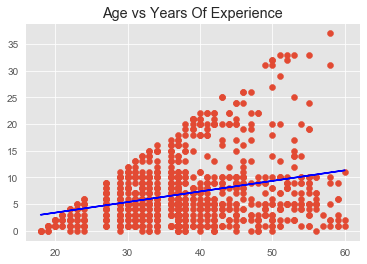

In [99]:
# Lets check years of experience vs Age

plt.scatter(df2['Age'],df2['YearsAtCompany'])
plt.plot(df['Age'],p*df['Age']+r,c='b')
plt.title("Age vs Years Of Experience");

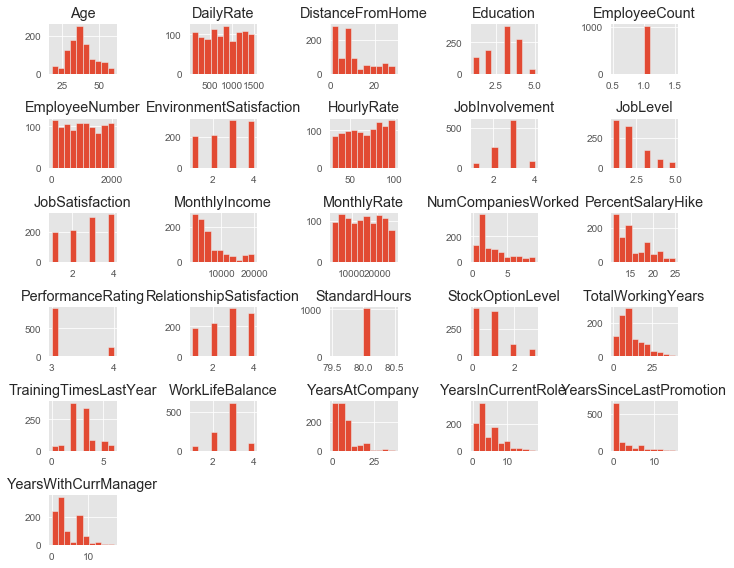

In [100]:
# Histogram of the dataset
df2.hist(figsize=(10,8));
plt.tight_layout()

In [101]:
# Age Group Creation
c = [];
for i in df2['Age']:
    if i<30:c.append('<30')
    elif i>=30 and i<=50: c.append('30-50')
    elif i>50:c.append('>50');  
df2['Age Group'] = c;

C:\Users\Aravind R\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


## Major Factors for Churn Rate

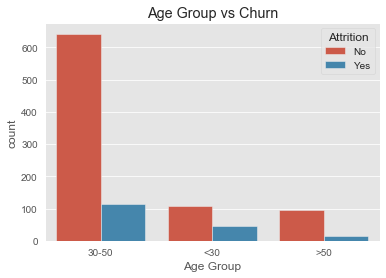

In [102]:
# Churn Rate based on Age Group
sns.countplot(df2['Age Group'],hue=df2['Attrition'])
plt.title('Age Group vs Churn');

* From the above graph the age group between 30-50 are in more vulnerable state and to be Concentrated More

* From the below graph the Employees who are traveling rarely have more possibility to leave and stay

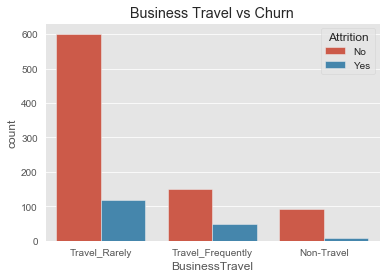

In [103]:
# Churn Rate based on Traveling Frequency
sns.countplot(df2['BusinessTravel'],hue=df2['Attrition'])
plt.title('Business Travel vs Churn');

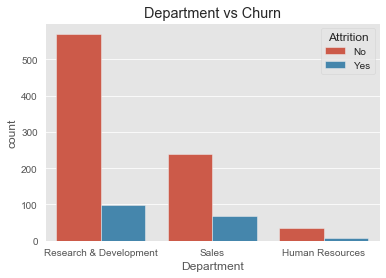

In [104]:
# Churn Rate based on Department
sns.countplot(df2['Department'],hue=df2['Attrition'])
plt.title('Department vs Churn');

* From the above viz employeers in R&D Department have High Churn Probability and to be more concentrated

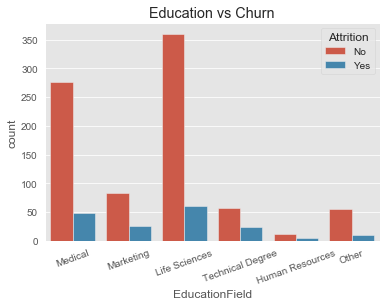

In [105]:
# Churn Rate based on Education field
sns.countplot(df2['EducationField'],hue=df2['Attrition'])
plt.xticks(rotation=20)
plt.title('Education vs Churn');

* Considering Education Field Employeers Majored in life Sciences have major impact on Churn Rate

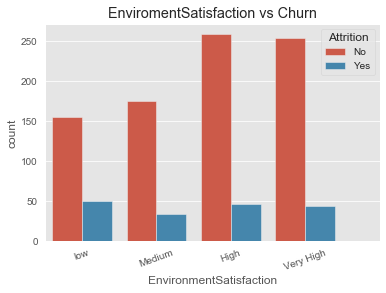

In [106]:
# Churn Rate based on Environment
sns.countplot(df2['EnvironmentSatisfaction'],hue=df2['Attrition'])
plt.xticks(np.arange(0,5),labels=['low','Medium','High','Very High'],rotation=20)
plt.title('EnviromentSatisfaction vs Churn');

* It is Self exploritory that employeers having Poort satisfaction with environment has higher chance to Churn

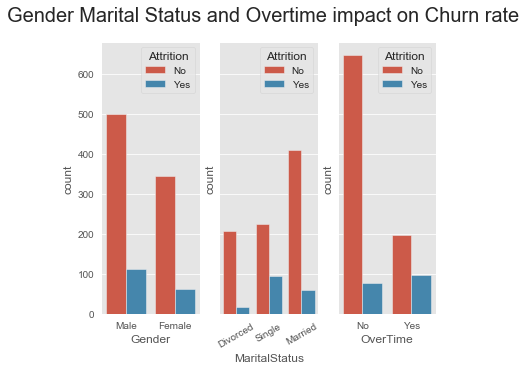

In [107]:
# Detailed Churn For All Categories

features = ['Gender','MaritalStatus','OverTime']
fig,ax1 = plt.subplots(nrows=1,ncols=3,sharey=True,figsize=(6,5))
fig.suptitle("Gender Marital Status and Overtime impact on Churn rate",fontsize=20)
sns.countplot(df2['Gender'],hue=df2['Attrition'],ax=ax1[0])
sns.countplot(df2['MaritalStatus'],hue=df2['Attrition'],ax=ax1[1])
sns.countplot(df2['OverTime'],hue=df2['Attrition'],ax=ax1[2])
ax1[1].set_xticklabels(labels=['Divorced','Single','Married'],rotation=30);

* From the Three Graphical Representations Male Employees who are Single and working Overtime are prey to leave this company

In [108]:
# Quering Data from repository based on the insights we gathered
Expected = len(df2[(df2['Age Group']=='30-50') & (df2['Gender']=='Male') & (df2['Attrition']=='Yes') & (df2['OverTime']=='Yes') &(df2['MaritalStatus']=='Single')&(df2['Department']=='Research & Development')])
print("No Employees Matching All the above Criteria:",Expected)


No Employees Matching All the above Criteria: 11


In [109]:
# Continuing Vizz

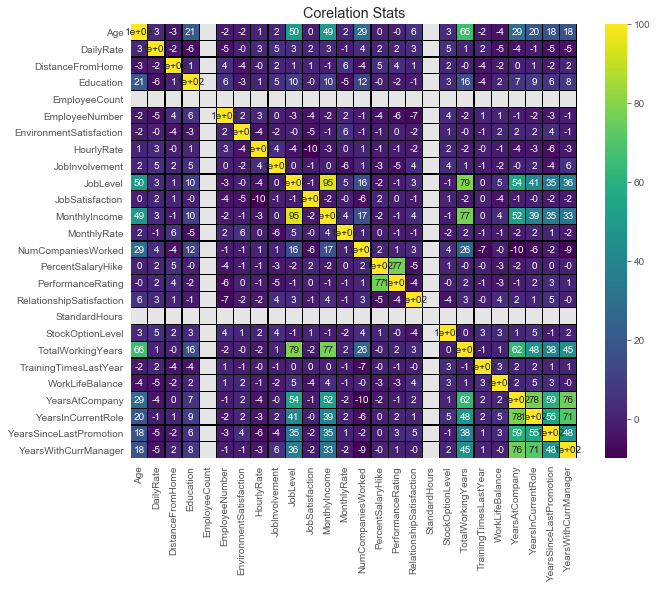

In [110]:
# Correlation heat map
plt.figure(figsize=(10,8))
ax = sns.heatmap(round(df3.corr()*100,0),cmap='viridis',linewidths=0.2,linecolor='black',annot=True);
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.title("Corelation Stats");

The Correlation Strength is :65%


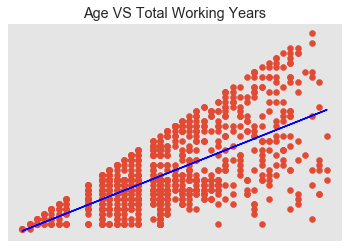

In [111]:
m,c = np.polyfit(df2['Age'],df2['TotalWorkingYears'],deg=1)
plt.scatter(df2['Age'],df2['TotalWorkingYears'])
plt.plot(df2['Age'],m*df2['Age']+c,c='b');
plt.title("Age VS Total Working Years")
# Confirming Corelation using scipy
plt.xticks(ticks=[],labels="")
plt.yticks(ticks=[],labels="")
from scipy import stats
print("The Correlation Strength is :"+str(int(stats.pearsonr(df2['Age'],df2['TotalWorkingYears'])[0]*100))+"%")

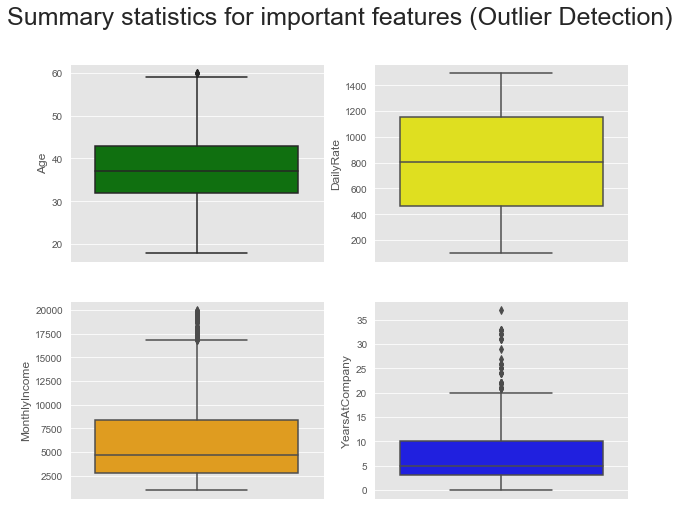

In [112]:
# Outlier determination
fig,ax = plt.subplots(ncols=2,nrows=2,figsize=(10,8))
fig.suptitle("Summary statistics for important features (Outlier Detection)",fontsize=25)
sns.boxplot(df2.Age,orient='v',color='green',ax=ax[0,0])
sns.boxplot(df2.DailyRate,orient='v',color='yellow',ax=ax[0,1])
sns.boxplot(df2.MonthlyIncome,orient='v',color='orange',ax=ax[1,0])
sns.boxplot(df2.YearsAtCompany,orient='v',color='blue',ax=ax[1,1]);

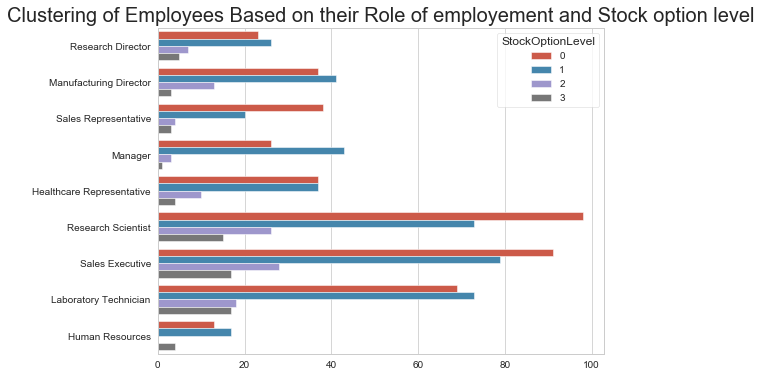

In [113]:
# How many employees in each job role along with stock option per Job role
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.countplot(y=df2.JobRole,hue=df2.StockOptionLevel);
plt.ylabel("");
plt.xlabel("");
plt.title("Clustering of Employees Based on their Role of employement and Stock option level",fontsize=20);

* Sales Executive, Research Scientist , Lab Technician have more stock options  because more employees are involved and stock option level 3 is provided more to these respective Roles

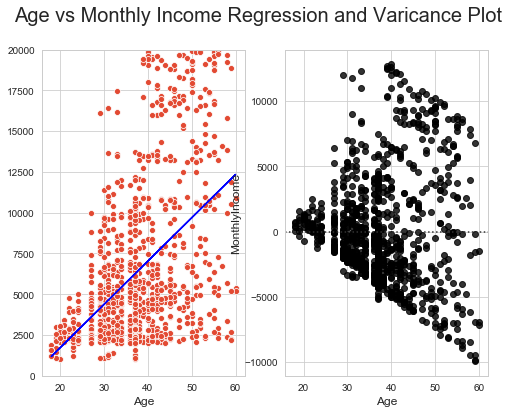

In [114]:
# Variance Determination 
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(8,6))
fig.suptitle("Age vs Monthly Income Regression and Varicance Plot",fontsize=20)
sns.residplot(df2.Age,df2.MonthlyIncome,ax[1],color='black')
m,c = np.polyfit(df2.Age,df2.MonthlyIncome,deg=1)
sns.scatterplot(df2.Age,df2.MonthlyIncome,ax=ax[0])
ax[0].plot(df2.Age,m*df2.Age+c,c='b');
ax[0].set_ylim(0,20000)
ax[0].set_ylabel("");

## Model Development  and Handling Imbalances

* Encoding categorical Variables
* Smote Over sampling to handle imbalances
* Model development(RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier,AdaBoostClassifier)

In [115]:
df3 = df2.copy()

In [116]:
df3.drop('Age Group',axis=1,inplace=True)

In [117]:
df3.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,50.0,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,4,...,80,1,32,1,2,5,4,1,3,No
1,36.0,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,2,...,80,2,7,0,3,3,2,0,1,No
2,21.0,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,2,...,80,0,1,3,3,1,0,1,0,Yes
3,50.0,Travel_Frequently,1246.0,Human Resources,8.0,3,Medical,1,644,1,...,80,1,32,2,3,32,5,10,7,No
4,52.0,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,2,...,80,0,18,4,3,8,6,4,0,No


In [118]:
# Encoding Cat Variables
for i in df3.columns:
    if pd.api.types.is_string_dtype(df3[i]):
        df3[i]=pd.Categorical(df3[i]).codes

In [119]:
df3.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,50.0,2,1126.0,1,1.0,2,3,1,997,4,...,80,1,32,1,2,5,4,1,3,0
1,36.0,2,216.0,1,6.0,2,3,1,178,2,...,80,2,7,0,3,3,2,0,1,0
2,21.0,2,337.0,2,7.0,1,2,1,1780,2,...,80,0,1,3,3,1,0,1,0,1
3,50.0,1,1246.0,0,8.0,3,3,1,644,1,...,80,1,32,2,3,32,5,10,7,0
4,52.0,2,994.0,1,7.0,4,1,1,1118,2,...,80,0,18,4,3,8,6,4,0,0


In [120]:
# Performing Smote
X = df3.iloc[:,:-1].values
y = df3.iloc[:,-1].values

# Smote 

sm = SMOTE()
X,y = sm.fit_resample(X,y)

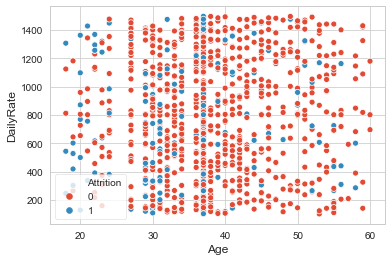

In [121]:
# Before Smote 
sns.scatterplot(df3['Age'],df3['DailyRate'],hue=df3['Attrition'])

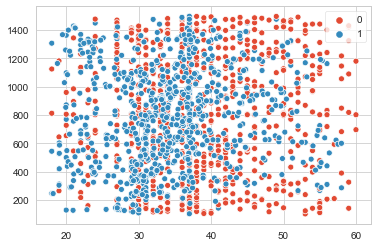

In [122]:
# After Smote The imbalancing is reduced
sns.scatterplot(X[:,0],X[:,2],hue=y)

#### Custom Performance Evaluation Engine (for classification problems)
* Developed by (Aravind R)




In [123]:
# Model Performance Evaluator

def Model_Performance(model,name):

    """
    Custom Performance Engine (For classification Problems) by Aravind R
        1.accuracy_score
        2.balanced_accuracy_score
        3.plot_roc_curve and Score
        4.plot_precision_recall_curve
        5.cohen_kappa_score
        6.log_loss
        7.Confusion Matrix
        8.Classification Report
    """
    
    print(f"\t\t {name} Performance Outline \t\t")
    pred_train = model.predict(X_train)
    pred_train_proba = model.predict_proba(X_train)
    
    pred_test = model.predict(X_test)
    pred_test_proba = model.predict_proba(X_test)
    
    print()
    print("\t Training Results\t")
    print()
    print("Accuracy Score: ",accuracy_score(y_train,pred_train))
    print("Balanced Accuracy Score: ",balanced_accuracy_score(y_train,pred_train))
    print("Cohen Kappa Score: ",cohen_kappa_score(y_train,pred_train))
    print("Log Loss: ",log_loss(y_train,pred_train_proba))
    print("Roc Score: ",roc_auc_score(y_train,pred_train_proba[:,1]))
    print("Confusion Matrix:\n",confusion_matrix(y_train,pred_train))
    print("Classification Report:\n",classification_report(y_train,pred_train))
    plot_roc_curve(model,X_train,y_train)
    plot_precision_recall_curve(model,X_train,y_train)
    print()
    
    
    print("\t Testing Results\t")
    print()
    print("Accuracy Score: ",accuracy_score(y_test,pred_test))
    print("Balanced Accuracy Score: ",balanced_accuracy_score(y_test,pred_test))
    print("Cohen Kappa Score: ",cohen_kappa_score(y_test,pred_test))
    print("Log Loss: ",log_loss(y_test,pred_test_proba))
    print("Roc Score: ",roc_auc_score(y_test,pred_test_proba[:,1]))
    print("Confusion Matrix: \n",confusion_matrix(y_test,pred_test))
    print("Classification Report\n",classification_report(y_test,pred_test))
    plot_roc_curve(model,X_test,y_test)
    plot_precision_recall_curve(model,X_test,y_test)
    

In [124]:
# Spliting into training and validation set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [147]:
# Baseline Engine

Baseline_randomForestEngine = RandomForestClassifier(n_estimators=100,criterion='entropy')
Baseline_randomForestEngine.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

		 Random Forest Baseline Engine Performance Outline 		

	 Training Results	

Accuracy Score:  1.0
Balanced Accuracy Score:  1.0
Cohen Kappa Score:  1.0
Log Loss:  0.07594113367295645
Roc Score:  0.9999999999999999
Confusion Matrix:
 [[673   0]
 [  0 677]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       673
           1       1.00      1.00      1.00       677

    accuracy                           1.00      1350
   macro avg       1.00      1.00      1.00      1350
weighted avg       1.00      1.00      1.00      1350


	 Testing Results	

Accuracy Score:  0.9260355029585798
Balanced Accuracy Score:  0.925289771334524
Cohen Kappa Score:  0.851832368928634
Log Loss:  0.2561192614543084
Roc Score:  0.9754876212487306
Confusion Matrix: 
 [[169   2]
 [ 23 144]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       171
           1     

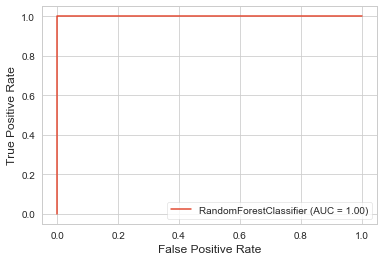

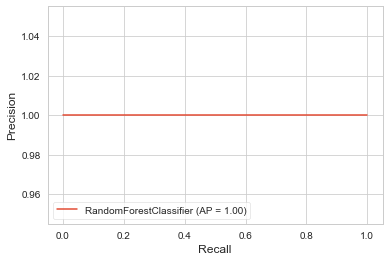

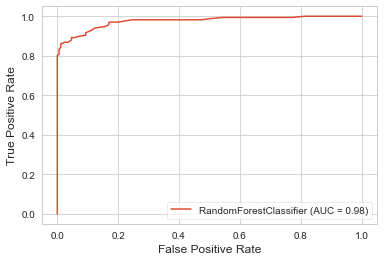

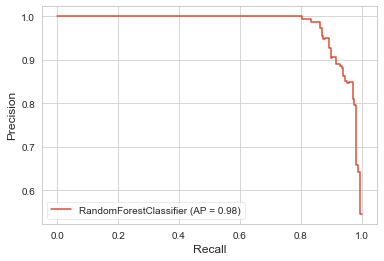

In [148]:
# Model Evaluation
Model_Performance(Baseline_randomForestEngine,"Random Forest Baseline Engine")

### From the above Metrics we cant  be more sure of this result and necessitates cross validation(Shuttle or stratified)

		 Ada Boost Performance Outline 		

	 Training Results	

Accuracy Score:  0.9355555555555556
Balanced Accuracy Score:  0.9355966911094966
Cohen Kappa Score:  0.871120728439469
Log Loss:  0.6520300780714582
Roc Score:  0.9824920273648493
Confusion Matrix:
 [[639  34]
 [ 53 624]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       673
           1       0.95      0.92      0.93       677

    accuracy                           0.94      1350
   macro avg       0.94      0.94      0.94      1350
weighted avg       0.94      0.94      0.94      1350


	 Testing Results	

Accuracy Score:  0.8846153846153846
Balanced Accuracy Score:  0.8847042756592078
Cohen Kappa Score:  0.769246927843714
Log Loss:  0.6559651062507974
Roc Score:  0.9622159190391147
Confusion Matrix: 
 [[150  21]
 [ 18 149]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.88      0.88    

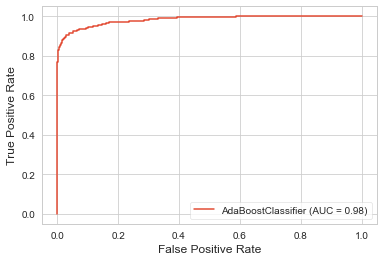

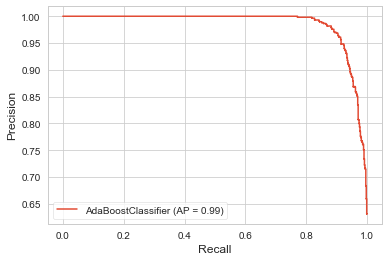

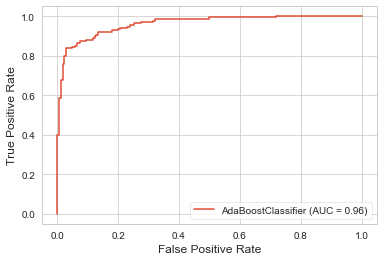

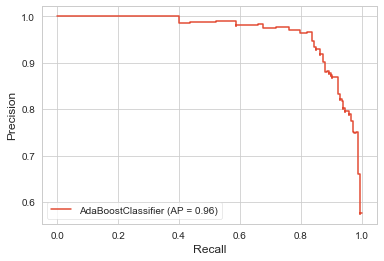

In [128]:
# Lets use adaboost classifier 

baseline_adaboost = AdaBoostClassifier()
baseline_adaboost.fit(X_train,y_train)
Model_Performance(baseline_adaboost,"Ada Boost")

		 Bagging Performance Outline 		

	 Training Results	

Accuracy Score:  1.0
Balanced Accuracy Score:  1.0
Cohen Kappa Score:  1.0
Log Loss:  0.06956597973271757
Roc Score:  1.0
Confusion Matrix:
 [[673   0]
 [  0 677]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       673
           1       1.00      1.00      1.00       677

    accuracy                           1.00      1350
   macro avg       1.00      1.00      1.00      1350
weighted avg       1.00      1.00      1.00      1350


	 Testing Results	

Accuracy Score:  0.8875739644970414
Balanced Accuracy Score:  0.8871380046923696
Cohen Kappa Score:  0.7749272771878176
Log Loss:  0.25346161130975614
Roc Score:  0.9634590468186435
Confusion Matrix: 
 [[158  13]
 [ 25 142]]
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       171
           1       0.92      0.85      0.88       1

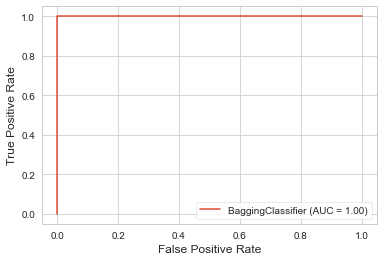

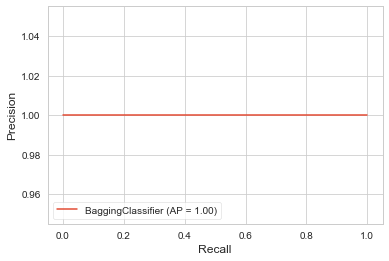

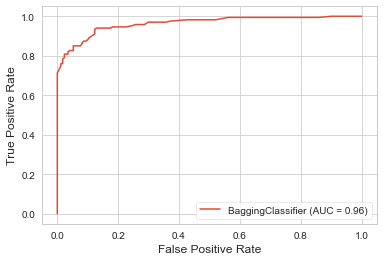

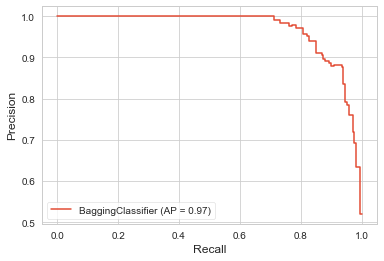

In [129]:
# Bagging Classifier

baseline_bagging = BaggingClassifier(n_estimators=100)
baseline_bagging.fit(X_train,y_train)
Model_Performance(baseline_bagging,"Bagging")

		 Gradient Boosting Performance Outline 		

	 Training Results	

Accuracy Score:  0.9755555555555555
Balanced Accuracy Score:  0.9756189903450456
Cohen Kappa Score:  0.951116904663151
Log Loss:  0.1233556641127793
Roc Score:  0.9974979204207006
Confusion Matrix:
 [[671   2]
 [ 31 646]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       673
           1       1.00      0.95      0.98       677

    accuracy                           0.98      1350
   macro avg       0.98      0.98      0.98      1350
weighted avg       0.98      0.98      0.98      1350


	 Testing Results	

Accuracy Score:  0.8994082840236687
Balanced Accuracy Score:  0.8989739818608398
Cohen Kappa Score:  0.7986191427469946
Log Loss:  0.21225811526076213
Roc Score:  0.975347550513009
Confusion Matrix: 
 [[160  11]
 [ 23 144]]
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.94     

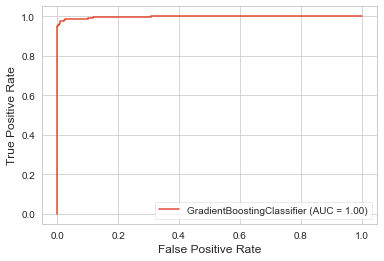

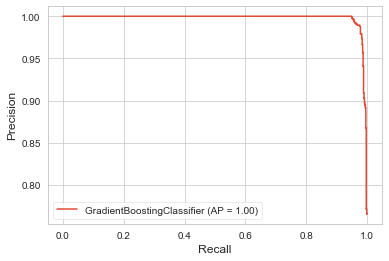

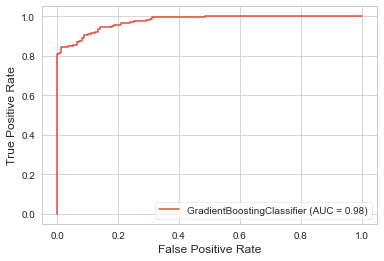

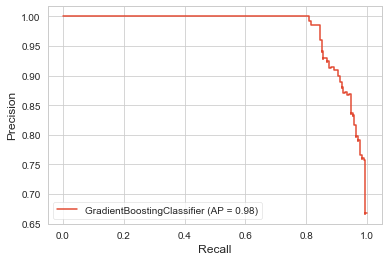

In [130]:
# Gradient Boosting
baseline_gradient = GradientBoostingClassifier()
baseline_gradient.fit(X_train,y_train)
Model_Performance(baseline_gradient,"Gradient Boosting")

		 KNN Performance Outline 		

	 Training Results	

Accuracy Score:  0.8588957055214724
Balanced Accuracy Score:  0.6126633986928104
Cohen Kappa Score:  0.3062289499981494
Log Loss:  0.2975055569002136
Roc Score:  0.8616830065359476
Confusion Matrix:
 [[667  13]
 [102  33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       680
           1       0.72      0.24      0.36       135

    accuracy                           0.86       815
   macro avg       0.79      0.61      0.64       815
weighted avg       0.84      0.86      0.83       815


	 Testing Results	

Accuracy Score:  0.7794117647058824
Balanced Accuracy Score:  0.5036585365853659
Cohen Kappa Score:  0.010349288486416475
Log Loss:  2.1928099391282623
Roc Score:  0.6133384146341463
Confusion Matrix: 
 [[157   7]
 [ 38   2]]
Classification Report
               precision    recall  f1-score   support

           0       0.81      0.96      0.87      

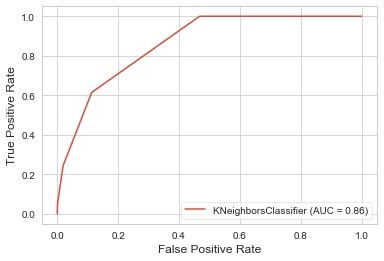

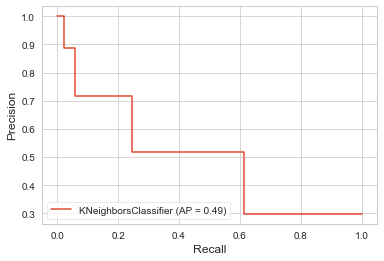

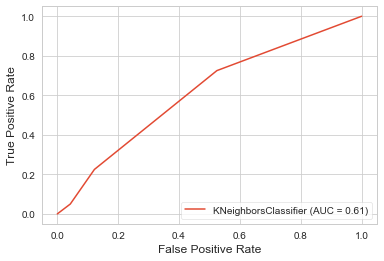

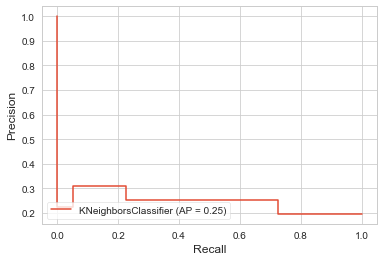

In [68]:
# knn 

baseline_neighbors = KNeighborsClassifier(n_neighbors=5)
baseline_neighbors.fit(X_train,y_train)
Model_Performance(baseline_neighbors,"KNN")

### Knn Performed the worst out of all ensemble technique

		 XG boost Performance Outline 		

	 Training Results	

Accuracy Score:  0.9651851851851851
Balanced Accuracy Score:  0.9652704769973289
Cohen Kappa Score:  0.9303816773791472
Log Loss:  0.13149600026443498
Roc Score:  0.9952306851527914
Confusion Matrix:
 [[669   4]
 [ 43 634]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       673
           1       0.99      0.94      0.96       677

    accuracy                           0.97      1350
   macro avg       0.97      0.97      0.97      1350
weighted avg       0.97      0.97      0.97      1350


	 Testing Results	

Accuracy Score:  0.9053254437869822
Balanced Accuracy Score:  0.904821935077214
Cohen Kappa Score:  0.8104385011742438
Log Loss:  0.2129634134707347
Roc Score:  0.9717757467521099
Confusion Matrix: 
 [[162   9]
 [ 23 144]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      0.95      0.91   

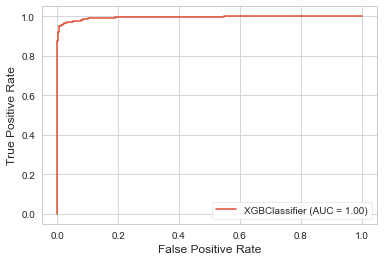

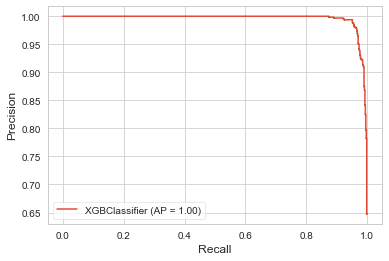

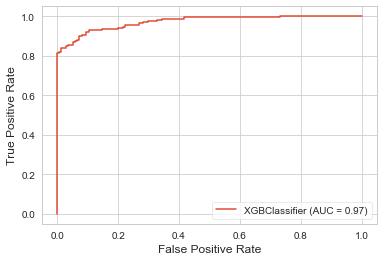

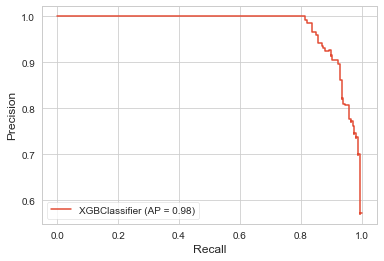

In [131]:
# Xg boost

baseline_xgboost = XGBClassifier()
baseline_xgboost.fit(X_train,y_train)
Model_Performance(baseline_xgboost,"XG boost")

Learning rate set to 0.011711
0:	learn: 0.6853962	total: 18.7ms	remaining: 18.7s
1:	learn: 0.6759273	total: 29.4ms	remaining: 14.7s
2:	learn: 0.6670885	total: 39.4ms	remaining: 13.1s
3:	learn: 0.6586789	total: 46.2ms	remaining: 11.5s
4:	learn: 0.6495387	total: 52ms	remaining: 10.4s
5:	learn: 0.6421189	total: 60ms	remaining: 9.94s
6:	learn: 0.6344028	total: 67.6ms	remaining: 9.6s
7:	learn: 0.6275157	total: 74.9ms	remaining: 9.29s
8:	learn: 0.6206439	total: 83.8ms	remaining: 9.23s
9:	learn: 0.6127119	total: 92.7ms	remaining: 9.18s
10:	learn: 0.6059237	total: 102ms	remaining: 9.18s
11:	learn: 0.5991094	total: 113ms	remaining: 9.27s
12:	learn: 0.5921468	total: 122ms	remaining: 9.25s
13:	learn: 0.5848428	total: 131ms	remaining: 9.22s
14:	learn: 0.5782149	total: 140ms	remaining: 9.19s
15:	learn: 0.5712964	total: 149ms	remaining: 9.16s
16:	learn: 0.5649124	total: 158ms	remaining: 9.13s
17:	learn: 0.5590200	total: 167ms	remaining: 9.11s
18:	learn: 0.5519539	total: 177ms	remaining: 9.16s
19:	le

174:	learn: 0.2374508	total: 1.56s	remaining: 7.36s
175:	learn: 0.2368505	total: 1.57s	remaining: 7.34s
176:	learn: 0.2362919	total: 1.58s	remaining: 7.33s
177:	learn: 0.2357314	total: 1.58s	remaining: 7.31s
178:	learn: 0.2351615	total: 1.59s	remaining: 7.29s
179:	learn: 0.2344964	total: 1.59s	remaining: 7.27s
180:	learn: 0.2337699	total: 1.6s	remaining: 7.25s
181:	learn: 0.2330914	total: 1.61s	remaining: 7.25s
182:	learn: 0.2325993	total: 1.62s	remaining: 7.24s
183:	learn: 0.2319528	total: 1.63s	remaining: 7.23s
184:	learn: 0.2314052	total: 1.64s	remaining: 7.22s
185:	learn: 0.2306461	total: 1.65s	remaining: 7.21s
186:	learn: 0.2300605	total: 1.66s	remaining: 7.21s
187:	learn: 0.2293613	total: 1.67s	remaining: 7.2s
188:	learn: 0.2285939	total: 1.68s	remaining: 7.19s
189:	learn: 0.2280446	total: 1.68s	remaining: 7.18s
190:	learn: 0.2272169	total: 1.69s	remaining: 7.17s
191:	learn: 0.2267835	total: 1.7s	remaining: 7.16s
192:	learn: 0.2259461	total: 1.71s	remaining: 7.16s
193:	learn: 0.2

352:	learn: 0.1584541	total: 2.96s	remaining: 5.42s
353:	learn: 0.1581222	total: 2.97s	remaining: 5.41s
354:	learn: 0.1578612	total: 2.97s	remaining: 5.4s
355:	learn: 0.1575827	total: 2.98s	remaining: 5.39s
356:	learn: 0.1573209	total: 2.99s	remaining: 5.38s
357:	learn: 0.1570519	total: 2.99s	remaining: 5.37s
358:	learn: 0.1567632	total: 3.01s	remaining: 5.37s
359:	learn: 0.1565013	total: 3.02s	remaining: 5.37s
360:	learn: 0.1561239	total: 3.03s	remaining: 5.36s
361:	learn: 0.1558716	total: 3.04s	remaining: 5.35s
362:	learn: 0.1555731	total: 3.05s	remaining: 5.35s
363:	learn: 0.1552343	total: 3.05s	remaining: 5.34s
364:	learn: 0.1548918	total: 3.06s	remaining: 5.33s
365:	learn: 0.1546211	total: 3.07s	remaining: 5.32s
366:	learn: 0.1542590	total: 3.08s	remaining: 5.31s
367:	learn: 0.1538617	total: 3.09s	remaining: 5.31s
368:	learn: 0.1536195	total: 3.1s	remaining: 5.3s
369:	learn: 0.1534146	total: 3.11s	remaining: 5.29s
370:	learn: 0.1531893	total: 3.11s	remaining: 5.28s
371:	learn: 0.1

525:	learn: 0.1171771	total: 4.34s	remaining: 3.91s
526:	learn: 0.1170118	total: 4.35s	remaining: 3.9s
527:	learn: 0.1168471	total: 4.36s	remaining: 3.9s
528:	learn: 0.1167047	total: 4.36s	remaining: 3.88s
529:	learn: 0.1165162	total: 4.37s	remaining: 3.87s
530:	learn: 0.1162502	total: 4.37s	remaining: 3.86s
531:	learn: 0.1160656	total: 4.38s	remaining: 3.85s
532:	learn: 0.1157722	total: 4.39s	remaining: 3.84s
533:	learn: 0.1155987	total: 4.39s	remaining: 3.83s
534:	learn: 0.1153965	total: 4.41s	remaining: 3.83s
535:	learn: 0.1151702	total: 4.41s	remaining: 3.82s
536:	learn: 0.1149124	total: 4.42s	remaining: 3.81s
537:	learn: 0.1146913	total: 4.43s	remaining: 3.8s
538:	learn: 0.1144550	total: 4.44s	remaining: 3.79s
539:	learn: 0.1142471	total: 4.45s	remaining: 3.79s
540:	learn: 0.1140429	total: 4.45s	remaining: 3.78s
541:	learn: 0.1138834	total: 4.46s	remaining: 3.77s
542:	learn: 0.1136127	total: 4.47s	remaining: 3.76s
543:	learn: 0.1133462	total: 4.48s	remaining: 3.76s
544:	learn: 0.1

702:	learn: 0.0872099	total: 5.74s	remaining: 2.42s
703:	learn: 0.0871009	total: 5.75s	remaining: 2.42s
704:	learn: 0.0870021	total: 5.75s	remaining: 2.41s
705:	learn: 0.0869120	total: 5.76s	remaining: 2.4s
706:	learn: 0.0867356	total: 5.77s	remaining: 2.39s
707:	learn: 0.0865827	total: 5.77s	remaining: 2.38s
708:	learn: 0.0864556	total: 5.78s	remaining: 2.37s
709:	learn: 0.0862936	total: 5.79s	remaining: 2.37s
710:	learn: 0.0861670	total: 5.8s	remaining: 2.36s
711:	learn: 0.0860632	total: 5.81s	remaining: 2.35s
712:	learn: 0.0859115	total: 5.82s	remaining: 2.34s
713:	learn: 0.0857842	total: 5.83s	remaining: 2.33s
714:	learn: 0.0855412	total: 5.84s	remaining: 2.33s
715:	learn: 0.0854326	total: 5.84s	remaining: 2.32s
716:	learn: 0.0852894	total: 5.85s	remaining: 2.31s
717:	learn: 0.0851705	total: 5.86s	remaining: 2.3s
718:	learn: 0.0849655	total: 5.87s	remaining: 2.29s
719:	learn: 0.0848123	total: 5.88s	remaining: 2.29s
720:	learn: 0.0847516	total: 5.89s	remaining: 2.28s
721:	learn: 0.0

878:	learn: 0.0657581	total: 7.13s	remaining: 981ms
879:	learn: 0.0656665	total: 7.13s	remaining: 973ms
880:	learn: 0.0655983	total: 7.14s	remaining: 965ms
881:	learn: 0.0655291	total: 7.14s	remaining: 956ms
882:	learn: 0.0654620	total: 7.15s	remaining: 948ms
883:	learn: 0.0653128	total: 7.16s	remaining: 939ms
884:	learn: 0.0652329	total: 7.16s	remaining: 931ms
885:	learn: 0.0651527	total: 7.17s	remaining: 922ms
886:	learn: 0.0650871	total: 7.18s	remaining: 914ms
887:	learn: 0.0649670	total: 7.19s	remaining: 907ms
888:	learn: 0.0648109	total: 7.2s	remaining: 899ms
889:	learn: 0.0646648	total: 7.21s	remaining: 892ms
890:	learn: 0.0646443	total: 7.22s	remaining: 884ms
891:	learn: 0.0645304	total: 7.23s	remaining: 876ms
892:	learn: 0.0644167	total: 7.24s	remaining: 868ms
893:	learn: 0.0642924	total: 7.25s	remaining: 860ms
894:	learn: 0.0641736	total: 7.26s	remaining: 851ms
895:	learn: 0.0640647	total: 7.26s	remaining: 843ms
896:	learn: 0.0639951	total: 7.27s	remaining: 835ms
897:	learn: 0

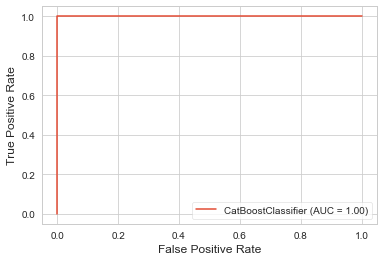

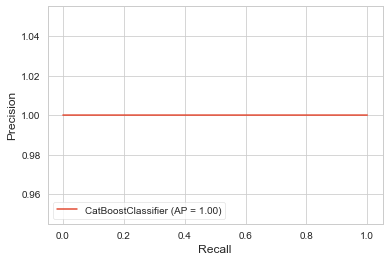

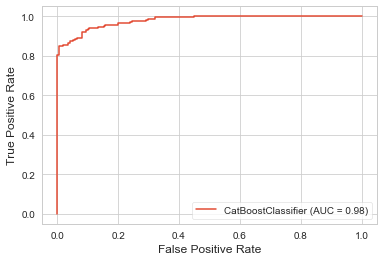

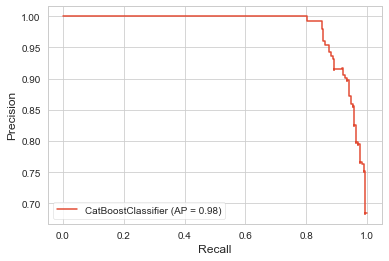

In [132]:
# Cat boost

baseline_catboost = CatBoostClassifier()
baseline_catboost.fit(X_train,y_train)
Model_Performance(baseline_catboost,"Cat boost")

###  Cat boost and Random Forest did a great Job for a particular random seed 
* Confirmation is obtained through cross validation

##  Model Tuning
* Changing Hyper paramters (Cat Boost and Random Forest)
* Grid search cv

In [133]:
Baseline_randomForestEngine.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [154]:
# randomized search for random forest

param_grid =  {
        "max_depth":[i for i in  range(10,30,6)],
        "max_features":['auto','sqrt'],
        "min_samples_split":[2,4,5,7,9],
        "min_samples_leaf":[i for i in range(1,10,2)],
        "n_estimators":[i for i in range(1,100)]
    }
baseline_tuning_randomized_search  =  RandomizedSearchCV(Baseline_randomForestEngine,param_distributions=param_grid,cv=10)
baseline_tuning_randomized_search.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(criterion='entropy'),
                   param_distributions={'max_depth': [10, 16, 22, 28],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5, 7, 9],
                                        'min_samples_split': [2, 4, 5, 7, 9],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]})

		 Tuned Random Forest Performance Outline 		

	 Training Results	

Accuracy Score:  0.9837037037037037
Balanced Accuracy Score:  0.9837474567677961
Cohen Kappa Score:  0.9674099824211421
Log Loss:  0.15346404483612772
Roc Score:  0.9996598049694811
Confusion Matrix:
 [[672   1]
 [ 21 656]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       673
           1       1.00      0.97      0.98       677

    accuracy                           0.98      1350
   macro avg       0.98      0.98      0.98      1350
weighted avg       0.98      0.98      0.98      1350


	 Testing Results	

Accuracy Score:  0.9289940828402367
Balanced Accuracy Score:  0.9283538186784326
Cohen Kappa Score:  0.85778899758073
Log Loss:  0.27407102252918025
Roc Score:  0.9756627096683825
Confusion Matrix: 
 [[168   3]
 [ 21 146]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.98  

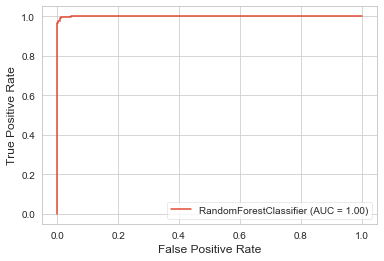

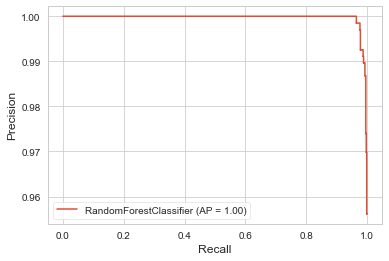

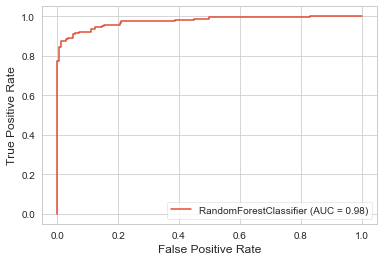

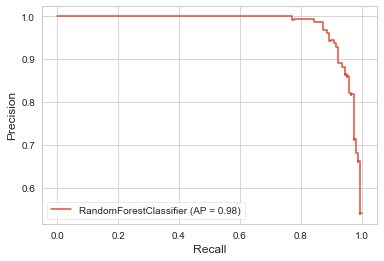

In [155]:
baseline_tuned_RandomForest = baseline_tuning_randomized_search.best_estimator_
baseline_tuned_RandomForest.fit(X_train,y_train)
Model_Performance(baseline_tuned_RandomForest,"Tuned Random Forest")

In [156]:
# After Tuning The increase in accuracy is 
print(f"{(0.9289-0.9260)*100:.2f}% Increase in accuracy of Random Forest engine")

0.29% Increase in accuracy of Random Forest engine


## Model Evaluation
* Cross Validation

In [157]:
#Cross validation
cross_validated_result = cross_val_score(baseline_tuned_RandomForest,X,y,cv=10,verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=   0.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ................................................. , total=   0.6s
[CV]  ................................................................
[CV] ................................................. , total=   0.6s
[CV]  ................................................................
[CV] ................................................. , total=   0.6s
[CV]  ................................................................
[CV] ................................................. , total=   0.6s
[CV]  ................................................................
[CV] ................................................. , total=   0.6s
[CV]  ................................................................
[CV] ................................................. , total=   0.6s
[CV]  ................................................................
[CV] ................................................. , total=   0.6s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.0s finished


In [158]:
# printing the cross validated Results

print(f"The Average Cross Validated Accuracy is {int(round(cross_validated_result.mean()*100,0))}%")
print()
print(f"The Standard deviation of the results is {cross_validated_result.std():.2f}")


The Average Cross Validated Accuracy is 91%

The Standard deviation of the results is 0.11


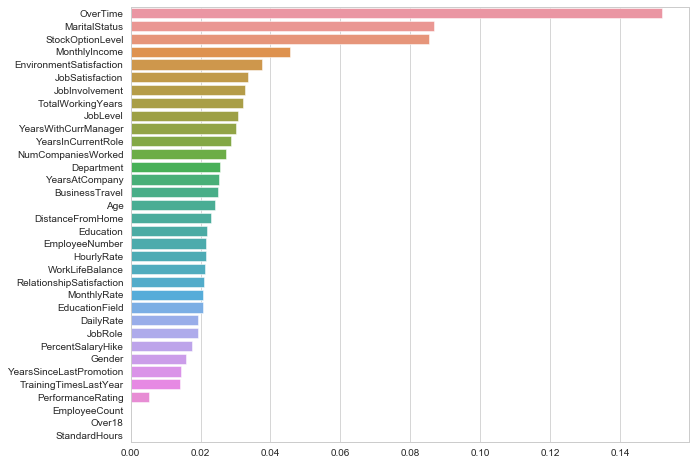

In [159]:
# Finding Major Components instigating Employeers to leave the Company based on the Model
c=[];l=[]
d = list(sorted(list(zip(df3.columns[:-1],baseline_tuned_RandomForest.feature_importances_)),key=lambda x:x[-1],reverse=True))
for i,j in d:
    c.append(i)
    l.append(j)
plt.figure(figsize=(10,8))
sns.barplot(l,c);

* Over Time Working  ---  Marital Status ----  Stock Option level ---  are Major factors that Influences Churn rate as per the Random Forest Model

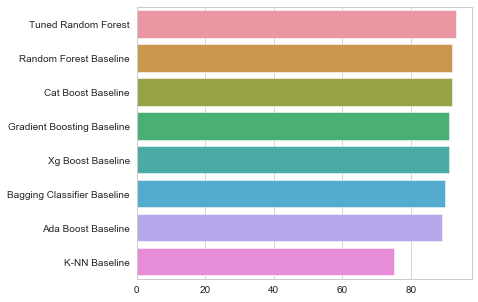

In [160]:
# Determining Best Model based on Testing Accuracy

Model_features = {
    "Random Forest Baseline":92,
    "Ada Boost Baseline":89,
    "Gradient Boosting Baseline":91,
    "Bagging Classifier Baseline":90,
    "K-NN Baseline":75,
    "Xg Boost Baseline":91,
    "Cat Boost Baseline":92,
    "Tuned Random Forest":93,
}
plt.figure(figsize=(6,5))
zipper = list(zip(list(Model_features.values()),list(Model_features.keys())))
zipper.sort(key=lambda x:x[0],reverse=True)
Features = [j for i,j in zipper]
Accuracies = [i for i,j in zipper]

sns.barplot(Accuracies,Features,);

* Random Forest and Catboost are Two Models with great accuracies and can be used to predict churn rate